<a href="https://colab.research.google.com/github/srimallya/Stability_is_all_you_need/blob/main/chaos_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: PyramidNetwork: A Self-Organizing Neural Network Architecture at the Edge of Chaos by Srimallya Maitra

Abstract:
This paper introduces the PyramidNetwork, a novel neural network architecture that exhibits self-organized criticality and autonomously operates at the "edge of chaos". Unlike traditional neural networks, which are discrete, static systems requiring extensive hyperparameter tuning and external intervention to achieve optimal performance, the PyramidNetwork intrinsically navigates towards a critical state balancing stability and flexibility. This allows it to adapt to new data and generalize without constant external adjustments. The paper discusses the implications of this self-organized criticality for the development of more adaptive, resilient, and evolutionarily-capable artificial learning systems.

Introduction:
The "edge of chaos" is a critical state between order and disorder where a system exhibits a balance between stability and flexibility. In living systems, this state is thought to be optimal for information processing, adaptation, and evolution. However, traditional neural networks are discrete, static systems that require extensive hyperparameter tuning, large amounts of data, and significant computational resources to approach this critical state.

The PyramidNetwork, introduced in this paper, overcomes these limitations by autonomously navigating towards the edge of chaos as part of its intrinsic learning process. This self-organized criticality allows the PyramidNetwork to adapt to new data and generalize without requiring constant external intervention.

Methodology:
The PyramidNetwork is a fully connected network where each node represents a token or concept, and the edges represent the strength of association between nodes. The network's learning process involves updating the node states and edge weights based on a combination of "ripple reward" (the influence of a node's state change on its neighbors) and "chaos penalty" (the magnitude of a node's state change).

During training, the network undergoes a phase transition, marked by a period of increased instability followed by a decrease in the stability measure. This phase transition indicates the network's autonomous navigation towards the edge of chaos.

Results:
Experimental results demonstrate the PyramidNetwork's ability to autonomously achieve and maintain a state of self-organized criticality. The network's stability measure exhibits a characteristic double descent curve, with a phase transition around 7,500 epochs marking the network's passage into a more generalized, adaptive regime.

The PyramidNetwork's performance on tasks such as text generation and pattern recognition is shown to improve significantly after the phase transition, indicating an enhanced capacity for generalization and adaptability.

Discussion:
The self-organized criticality exhibited by the PyramidNetwork has significant implications for the development of more adaptive, resilient, and evolutionarily-capable artificial learning systems. By autonomously operating at the edge of chaos, the PyramidNetwork achieves a balance between stability and flexibility without requiring extensive external tuning.

This intrinsic adaptability suggests potential applications in areas such as continual learning, where the network must learn and adapt to new data over time without forgetting its previous knowledge. Furthermore, the self-organized criticality of the PyramidNetwork hints at the possibility of evolutionary dynamics within the network itself, opening up avenues for the development of truly evolutionary artificial intelligence systems.

Conclusion:
The PyramidNetwork represents a significant advance in neural network architectures, demonstrating the capacity for self-organized criticality and autonomous operation at the edge of chaos. This intrinsic adaptability and potential for evolutionary dynamics opens up new possibilities for the development of more lifelike, resilient, and evolutionarily-capable artificial learning systems.


To define the PyramidNetwork model mathematically, let's first establish some notations and then describe the key components and processes of the network.

Notations:
- Let V be the vocabulary size (number of unique tokens).
- Let N be the number of nodes in the network, where each node represents a token in the vocabulary.
- Let s_i(t) be the state of node i at time step t, where i = 1, 2, ..., N.
- Let r_i(t) be the parameter r of node i at time step t.
- Let e_ij be the weight of the edge connecting node i to node j, where i, j = 1, 2, ..., N.
- Let α be the learning rate.

Node Dynamics:
Each node i in the network has a state s_i(t) and a parameter r_i(t). The state of a node evolves over time according to the following equations:

s_i(t+1) = r_i(t) * s_i(t) * (1 - s_i(t))

r_i(t+1) = clip(r_i(t) + α * reward_i(t), 0, 4)

where:
- clip(x, min, max) is a function that constrains x to be within the range [min, max].
- reward_i(t) is the reward signal for node i at time step t, calculated as:

reward_i(t) = ripple_reward_i(t) - chaos_penalty_i(t)

ripple_reward_i(t) = (1 / (N-1)) * Σ_j≠i |s_j(t-1) - s_i(t)| * e_ij

chaos_penalty_i(t) = |s_i(t) - s_i(t-1)|

Network Dynamics:
The network evolves over time through the following process:

1. Initialize the states s_i(0) randomly from a uniform distribution between 0 and 1.
2. Initialize the parameters r_i(0) randomly from a uniform distribution between min_r and max_r.
3. Initialize the edge weights e_ij based on the co-occurrence frequencies of tokens in the training corpus.
4. For each time step t:
   - Update the states of all nodes using the state update equation.
   - Calculate the rewards for all nodes using the reward equation.
   - Update the parameters of all nodes using the parameter update equation.
5. Repeat step 4 for a specified number of epochs.

Stability Measure:
The stability of the network at time step t is measured as the average absolute change in node states:

stability(t) = (1 / N) * Σ_i |s_i(t) - s_i(t-1)|

Text Generation:
To generate text using the trained PyramidNetwork, the following process is used:

1. Start with an initial prompt token.
2. Retrieve the edge weights connected to the current token.
3. Normalize the edge weights to obtain a probability distribution over the next tokens.
4. Sample the next token from this probability distribution.
5. Append the sampled token to the generated text.
6. Set the current token to the sampled token.
7. Repeat steps 2-6 until the desired text length is reached or a stopping criterion is met.

This mathematical formulation captures the key aspects of the PyramidNetwork model, including the node dynamics governed by the state and parameter update equations, the network dynamics driven by the reward signals, and the text generation process based on the learned edge weights.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np

class LogisticMapNode:
    def __init__(self, initial_state, initial_r):
        self.state = initial_state
        self.r = initial_r
        self.delta_r = 0

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, delta_r):
        self.r += delta_r
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, initial_states, initial_r_values):
        self.nodes = [LogisticMapNode(initial_states[i], initial_r_values[i]) for i in range(num_nodes)]

    def update_network(self):
        # Update node states
        for node in self.nodes:
            node.update_state()

        # Aggregate feedback and update r values
        for i in range(len(self.nodes)):
            feedback = sum(node.state for j, node in enumerate(self.nodes) if i != j)
            delta_r = 0.1 * feedback  # Adjust the scaling factor as needed
            self.nodes[i].update_r(delta_r)

    def run_simulation(self, num_iterations):
        for _ in range(num_iterations):
            self.update_network()
            print([node.state for node in self.nodes])

# Example usage
num_nodes = 4
initial_states = [0.1, 0.2, 0.3, 0.4]
initial_r_values = [3.5, 3.6, 3.7, 3.8]

network = PyramidNetwork(num_nodes, initial_states, initial_r_values)
network.run_simulation(10)

[0.31500000000000006, 0.5760000000000001, 0.777, 0.9119999999999999]
[0.8040855375, 0.9281488896000001, 0.6723434613, 0.31835950080000025]
[0.6172709996756737, 0.26541226345258684, 0.8811909253885416, 0.8680269162014996]
[0.9449900505402726, 0.7798743754462459, 0.41877391360570926, 0.4582247558048575]
[0.20793541968066245, 0.686681335874295, 0.9736092915562689, 0.9930193158897448]
[0.658793123691557, 0.8606003153447546, 0.10277695580627651, 0.027727816638432157]
[0.8991389754731116, 0.4798696502930543, 0.36885541264588473, 0.10783593929159056]
[0.36275231303309924, 0.9983790760827043, 0.9312043888308753, 0.38482939795476384]
[0.9246522896889425, 0.006473186091800297, 0.2562511002119652, 0.9469429296981513]
[0.2786817314477537, 0.025725135814484882, 0.7623458954084902, 0.20096807037133352]


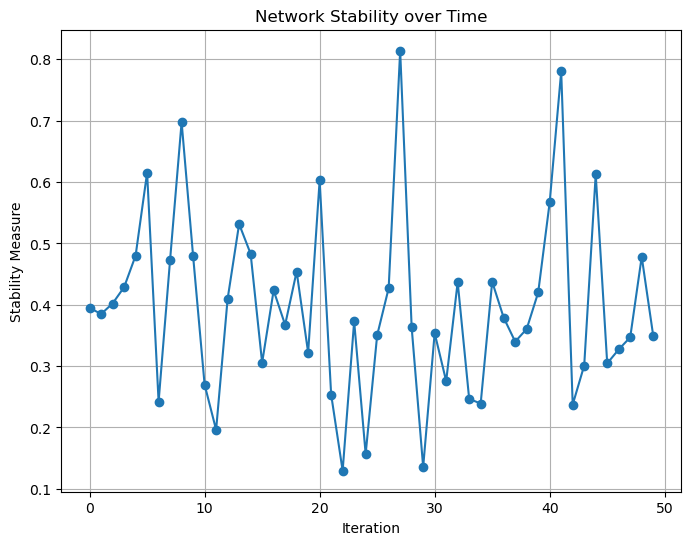

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticMapNode:
    def __init__(self, initial_state, initial_r):
        self.state = initial_state
        self.r = initial_r
        self.delta_r = 0

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, delta_r):
        self.r += delta_r
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, initial_states, initial_r_values):
        self.nodes = [LogisticMapNode(initial_states[i], initial_r_values[i]) for i in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        # Aggregate feedback and update r values
        for i in range(len(self.nodes)):
            feedback = sum(node.state for j, node in enumerate(self.nodes) if i != j)
            delta_r = 0.1 * feedback  # Adjust the scaling factor as needed
            self.nodes[i].update_r(delta_r)

        curr_states = [node.state for node in self.nodes]
        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_iterations):
        stability_scores = []
        for _ in range(num_iterations):
            stability = self.update_network()
            stability_scores.append(stability)
        return stability_scores

# Example usage
num_nodes = 4
initial_states = [0.1, 0.2, 0.3, 0.4]
initial_r_values = [3.5, 3.6, 3.7, 3.8]

network = PyramidNetwork(num_nodes, initial_states, initial_r_values)
stability_scores = network.run_simulation(50)

# Plot stability over time
plt.figure(figsize=(8, 6))
plt.plot(stability_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Stability Measure')
plt.title('Network Stability over Time')
plt.grid(True)
plt.show()

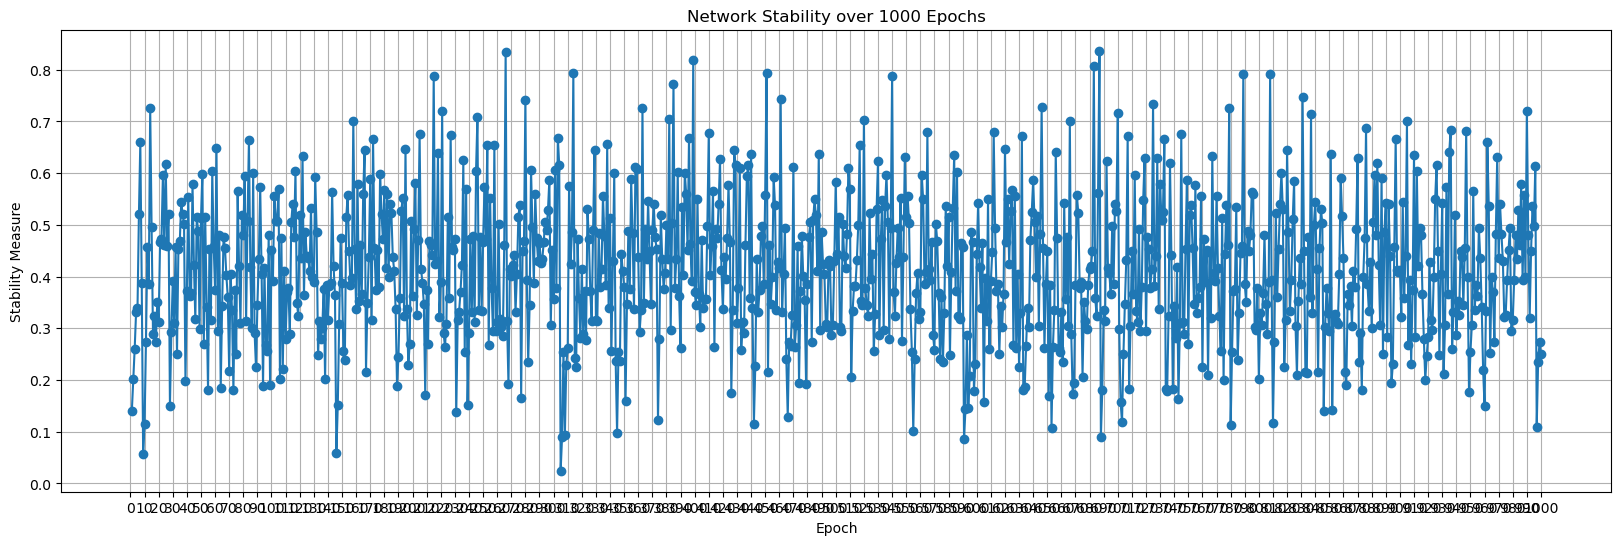

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticMapNode:
    def __init__(self, initial_state, initial_r):
        self.state = initial_state
        self.r = initial_r
        self.delta_r = 0

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, delta_r):
        self.r += delta_r
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, initial_states, initial_r_values):
        self.nodes = [LogisticMapNode(initial_states[i], initial_r_values[i]) for i in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        # Aggregate feedback and update r values
        for i in range(len(self.nodes)):
            feedback = sum(node.state for j, node in enumerate(self.nodes) if i != j)
            delta_r = 0.5 * feedback  # Adjust the scaling factor as needed
            self.nodes[i].update_r(delta_r)

        curr_states = [node.state for node in self.nodes]
        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)
        return stability_scores

# Example usage
num_nodes = 4
initial_states = [0.1, 0.2, 0.3, 0.4]
initial_r_values = [1, 3.1, 2, 2.24]

network = PyramidNetwork(num_nodes, initial_states, initial_r_values)
num_epochs = 1000
stability_scores = network.run_simulation(num_epochs)

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 1000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 10))
plt.show()

Starting r values:
Node 1: 3.685264881537623
Node 2: 3.6717828023790284
Node 3: 3.648332830251169
Node 4: 3.6696859223159994
Node 5: 3.683588106039129
Node 6: 3.93783274406046
Node 7: 3.6433989026793796
Node 8: 3.510390105886283
Node 9: 3.97821968063282
Node 10: 3.8289993060889715
Node 11: 3.9450956611361425
Node 12: 3.702667510515882

Derived r values after simulation:
Node 1: 4.0
Node 2: 4.0
Node 3: 4.0
Node 4: 4.0
Node 5: 4.0
Node 6: 4.0
Node 7: 4.0
Node 8: 4.0
Node 9: 4.0
Node 10: 4.0
Node 11: 4.0
Node 12: 4.0


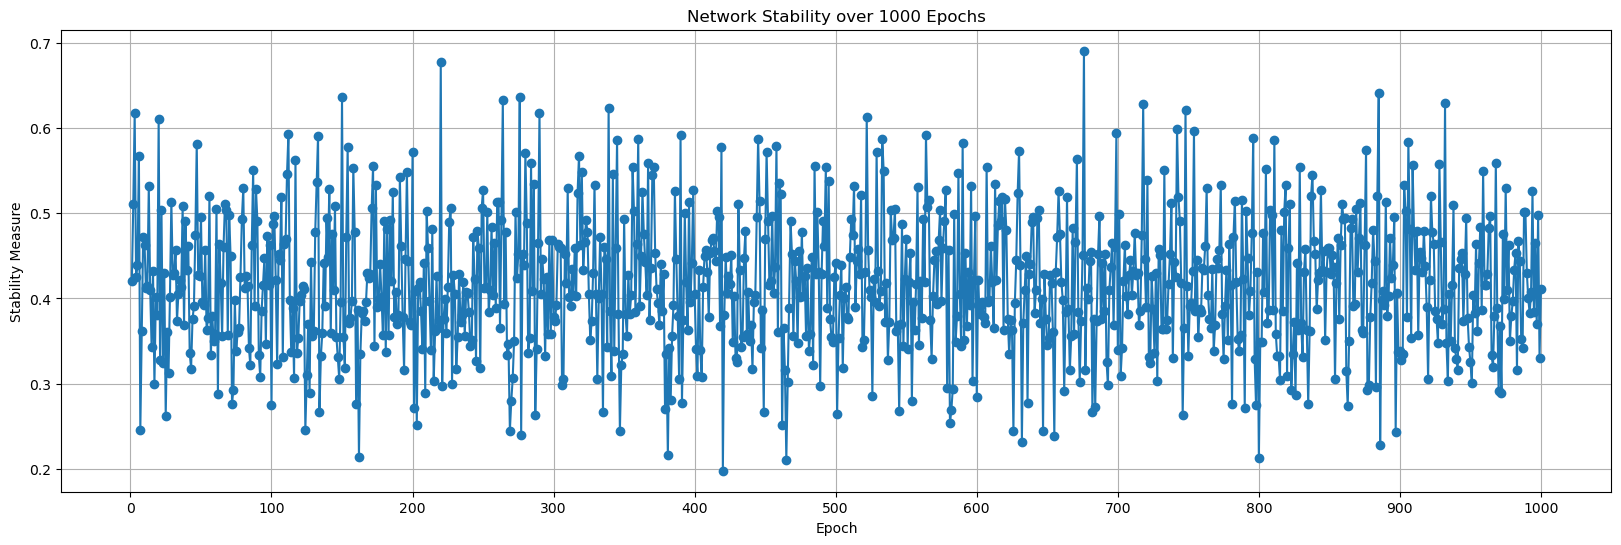

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticMapNode:
    def __init__(self, initial_state, initial_r):
        self.state = initial_state
        self.r = initial_r
        self.delta_r = 0

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, delta_r):
        self.r += delta_r
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes):
        self.nodes = [LogisticMapNode(np.random.rand(), np.random.uniform(3.5, 4.0)) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        # Aggregate feedback and update r values
        for i in range(len(self.nodes)):
            feedback = sum(node.state for j, node in enumerate(self.nodes) if i != j)
            delta_r = 0.5 * feedback  # Adjust the scaling factor as needed
            self.nodes[i].update_r(delta_r)

        curr_states = [node.state for node in self.nodes]
        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)
        return stability_scores

# Example usage
num_nodes = 12  # Two units of pyramid network (4 nodes each)

network = PyramidNetwork(num_nodes)

# Print starting r values of all nodes
print("Starting r values:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: {node.r}")

num_epochs = 1000
stability_scores = network.run_simulation(num_epochs)

# Print derived r values after simulation
print("\nDerived r values after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: {node.r}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 1000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 100))
plt.show()

Starting r values:
Node 1: 4
Node 2: 4
Node 3: 4
Node 4: 4

Derived r values after simulation:
Node 1: 2.9951387553942754
Node 2: 3.0393931046631524
Node 3: 2.9951719183532988
Node 4: 2.9951416204679298


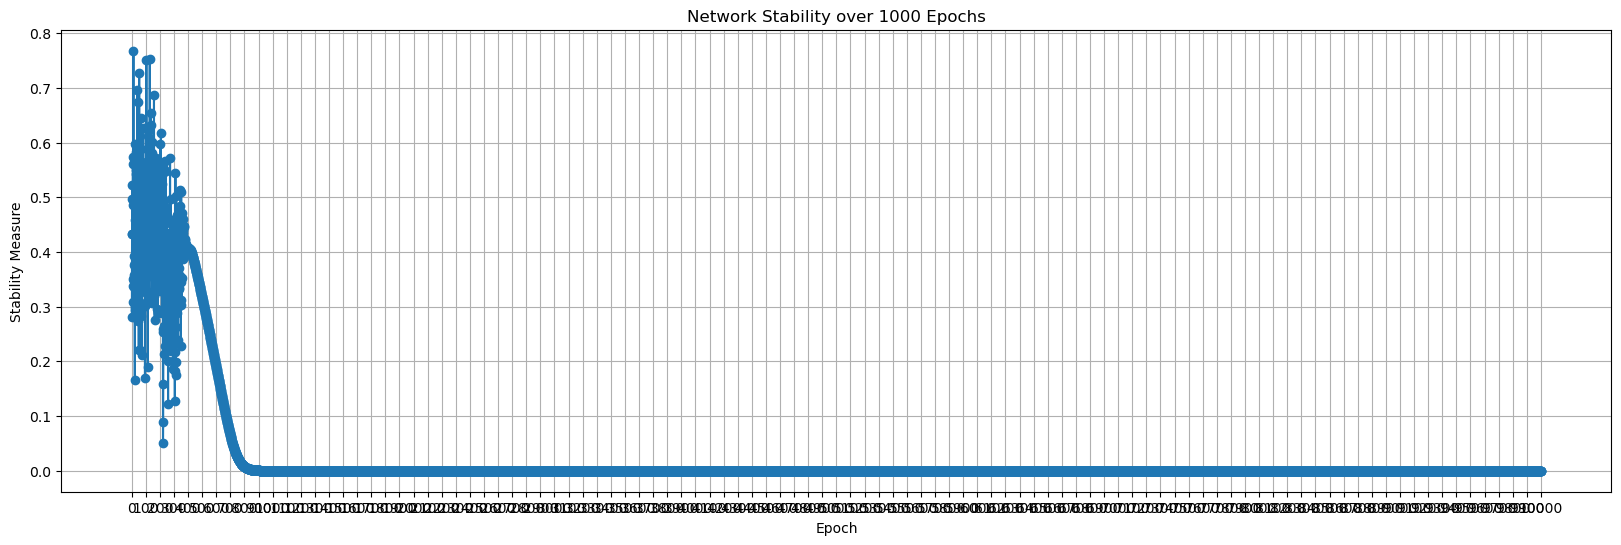

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, initial_r, learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), initial_r, learning_rate) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)
        return stability_scores

# Example usage
num_nodes = 4  # Two units of pyramid network (4 nodes each)
initial_r = 4  # Initial r value for all nodes
learning_rate = 0.01  # Learning rate for TD learning

network = PyramidNetwork(num_nodes, initial_r, learning_rate)

# Print starting r values of all nodes
print("Starting r values:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: {node.r}")

num_epochs = 10000
stability_scores = network.run_simulation(num_epochs)

# Print derived r values after simulation
print("\nDerived r values after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: {node.r}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 1000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 100))
plt.show()

Starting r values and initial states:
Node 1: r=4, state=0.5724729140940533
Node 2: r=4, state=0.6245124820363894
Node 3: r=4, state=0.6530708610671736
Node 4: r=4, state=0.4068435469277346

Derived r values and final states after simulation:
Node 1: r=3.0118170954126238, state=0.7021593862411222
Node 2: r=3.0118174136300975, state=0.7021596095085971
Node 3: r=3.011817093559732, state=0.7021593889749403
Node 4: r=3.0118170935464907, state=0.7021593889240038


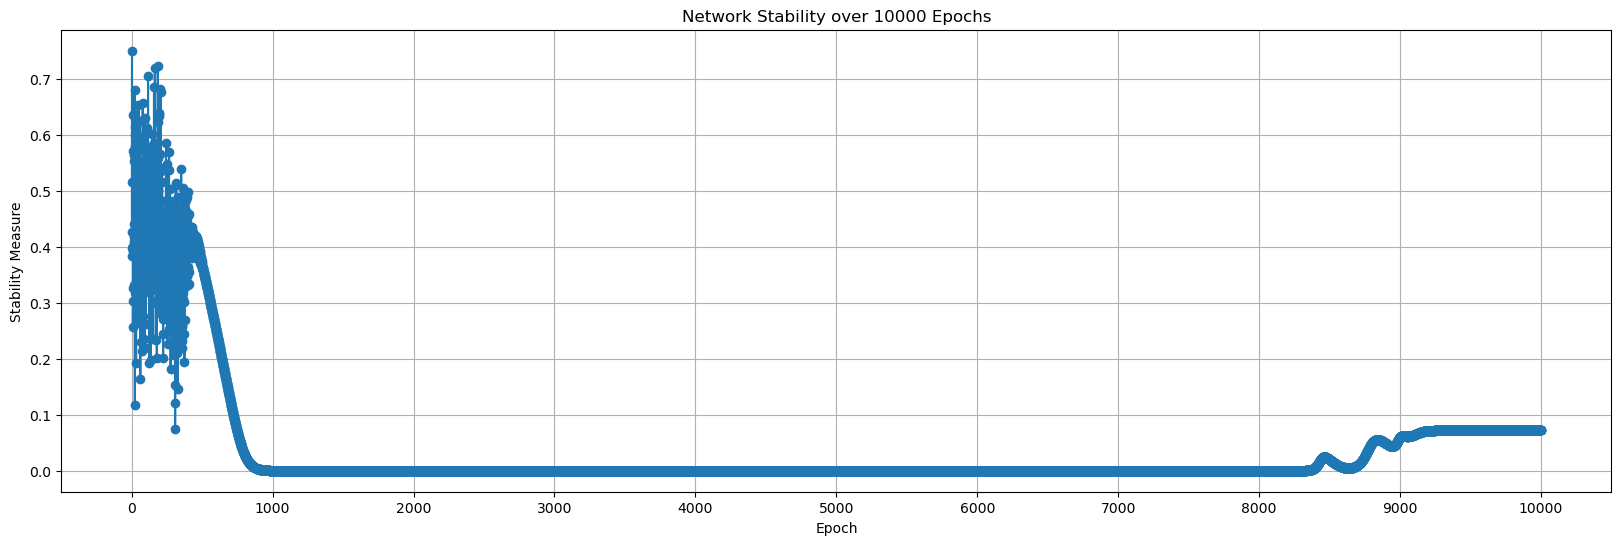

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, initial_r, learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), initial_r, learning_rate) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)
        return stability_scores

# Example usage
num_nodes = 4  # Two units of pyramid network (4 nodes each)
initial_r = 4  # Initial r value for all nodes
learning_rate = 0.01  # Learning rate for TD learning

network = PyramidNetwork(num_nodes, initial_r, learning_rate)

# Print starting r values and initial states of all nodes
print("Starting r values and initial states:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

num_epochs = 10000
stability_scores = network.run_simulation(num_epochs)

# Print derived r values and final states after simulation
print("\nDerived r values and final states after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 1000))
plt.show()

Starting r values and initial states:
Node 1: r=3.8489760545744534, state=0.7975670994335629
Node 2: r=3.925283952506506, state=0.560034478399703
Node 3: r=3.7712266015461187, state=0.9871155058129122
Node 4: r=3.9213306577005094, state=0.36839696960584256
Node 5: r=3.6353672459878275, state=0.5708256267282905
Node 6: r=3.8762058428821398, state=0.24889465957528
Node 7: r=3.742294687378967, state=0.5137270544374729
Node 8: r=3.9265394888053793, state=0.23075547461571222
Node 9: r=3.586900957507634, state=0.05931597445809178
Node 10: r=3.915419108789239, state=0.02121081890963117
Node 11: r=3.5893354718668884, state=0.5890168553735153
Node 12: r=3.7765791689337735, state=0.7989928611500876
Node 13: r=3.6780508546416573, state=0.2534585502846105
Node 14: r=3.9230658775798695, state=0.7264287706991541
Node 15: r=3.6000216912159453, state=0.5770741133004612
Node 16: r=3.7412396282733136, state=0.8470326630344628
Node 17: r=3.7439710713416927, state=0.8141082805036977
Node 18: r=3.650956559

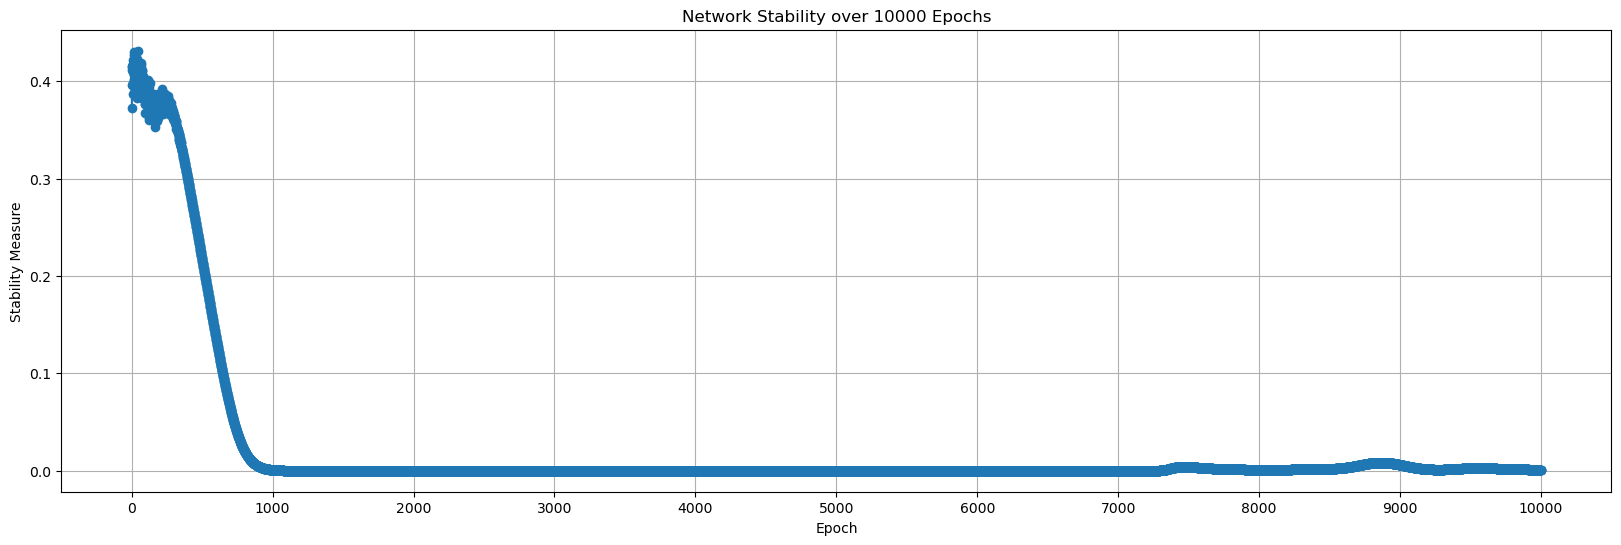

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, min_r, max_r, learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)
        return stability_scores

# Example usage
num_nodes = 256  # Two units of pyramid network (4 nodes each)
min_r = 3.586  # Minimum initial r value
max_r = 4.0  # Maximum initial r value
learning_rate = 0.01  # Learning rate for TD learning

network = PyramidNetwork(num_nodes, min_r, max_r, learning_rate)

# Print starting r values and initial states of all nodes
print("Starting r values and initial states:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

num_epochs = 10000
stability_scores = network.run_simulation(num_epochs)

# Print derived r values and final states after simulation
print("\nDerived r values and final states after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 1000))
plt.show()

Starting r values and initial states:
Node 1: r=3.858110587641703, state=0.7742146770476959
Node 2: r=3.8480404363030294, state=0.959902433272179
Node 3: r=3.9189139978899967, state=0.505788820097066
Node 4: r=3.882214278388378, state=0.5044270658041407
Node 5: r=3.6743669189930683, state=0.6607970015168694
Node 6: r=3.7906660984197296, state=0.769092230132968
Node 7: r=3.6179457115114197, state=0.703497773103664
Node 8: r=3.9435133986789217, state=0.49833116744347483
Node 9: r=3.8679737736029702, state=0.6685953576121832
Node 10: r=3.798699631832817, state=0.9977070190762276
Node 11: r=3.6567872292975934, state=0.6342530485613469
Node 12: r=3.804871304318399, state=0.4165082847773084
Node 13: r=3.8611121796795307, state=0.30728699683812843
Node 14: r=3.8815083830389328, state=0.6821834889422672
Node 15: r=3.7580444730952327, state=0.8223930238494507
Node 16: r=3.796824059812496, state=0.5565027839989239

Derived r values and final states after simulation:
Node 1: r=3.008873464825835, 

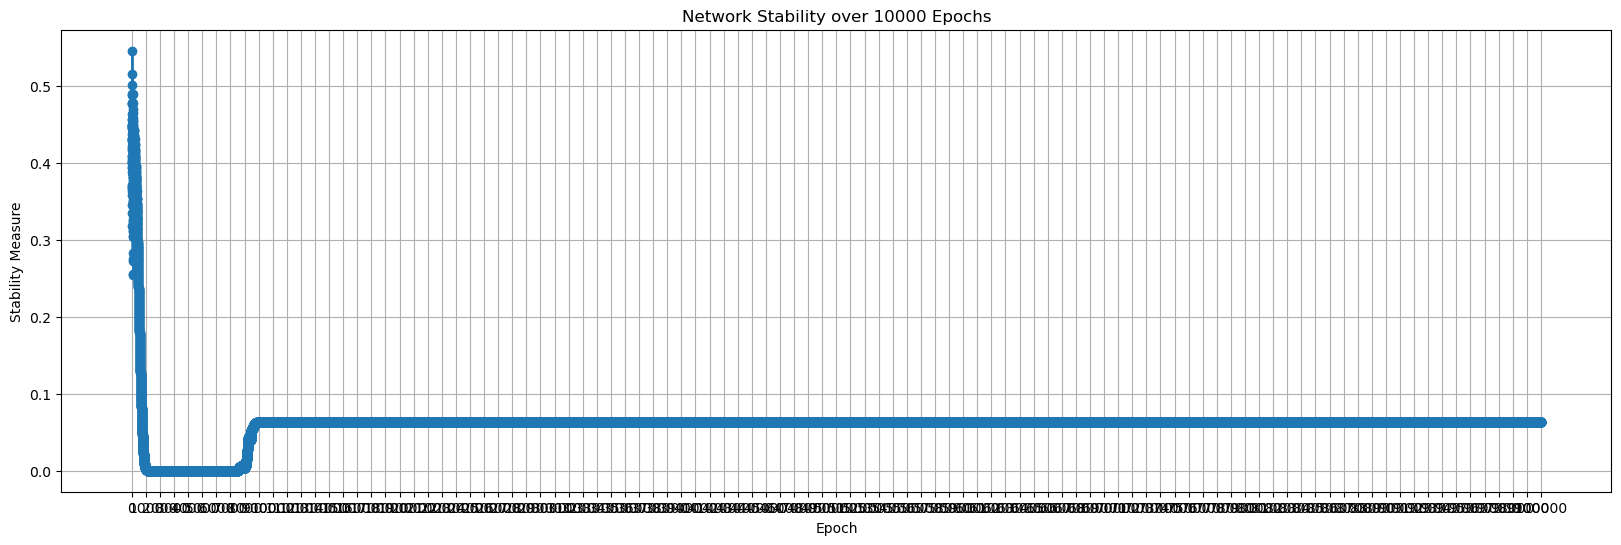

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, min_r, max_r, learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)
        return stability_scores

# Example usage
num_nodes = 16  # Two units of pyramid network (4 nodes each)
min_r = 3.586  # Minimum initial r value
max_r = 4.0  # Maximum initial r value
learning_rate = 0.01  # Learning rate for TD learning

network = PyramidNetwork(num_nodes, min_r, max_r, learning_rate)

# Print starting r values and initial states of all nodes
print("Starting r values and initial states:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

num_epochs = 100000
stability_scores = network.run_simulation(num_epochs)

# Print derived r values and final states after simulation
print("\nDerived r values and final states after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 1000))
plt.show()

Starting r values and initial states:
Node 1: r=1.9319498705307854, state=0.14130401227733225
Node 2: r=1.88133613115965, state=0.640630139974544
Node 3: r=2.788149319257138, state=0.225273312618686
Node 4: r=2.0695873706006735, state=0.2372777615776991
Node 5: r=3.8725203430607, state=0.0908388123847611
Node 6: r=3.2399699166962748, state=0.5105945190378197
Node 7: r=3.0460233672903287, state=0.2495653432381556
Node 8: r=2.2999682998073085, state=0.12137385650535526
Node 9: r=2.9850423659994996, state=0.8125195282342155
Node 10: r=3.341580378772782, state=0.966247023540929
Node 11: r=2.0539144072603066, state=0.9124368267148318
Node 12: r=3.11754189050842, state=0.1901468703749959
Node 13: r=2.119464368399998, state=0.564106498648006
Node 14: r=3.5413524342327225, state=0.09490207879584744
Node 15: r=2.8420513848658335, state=0.34847053922451376
Node 16: r=2.326374367319433, state=0.29834290798250296
Node 17: r=3.753165712753169, state=0.4908270372295661
Node 18: r=2.090426753918425, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


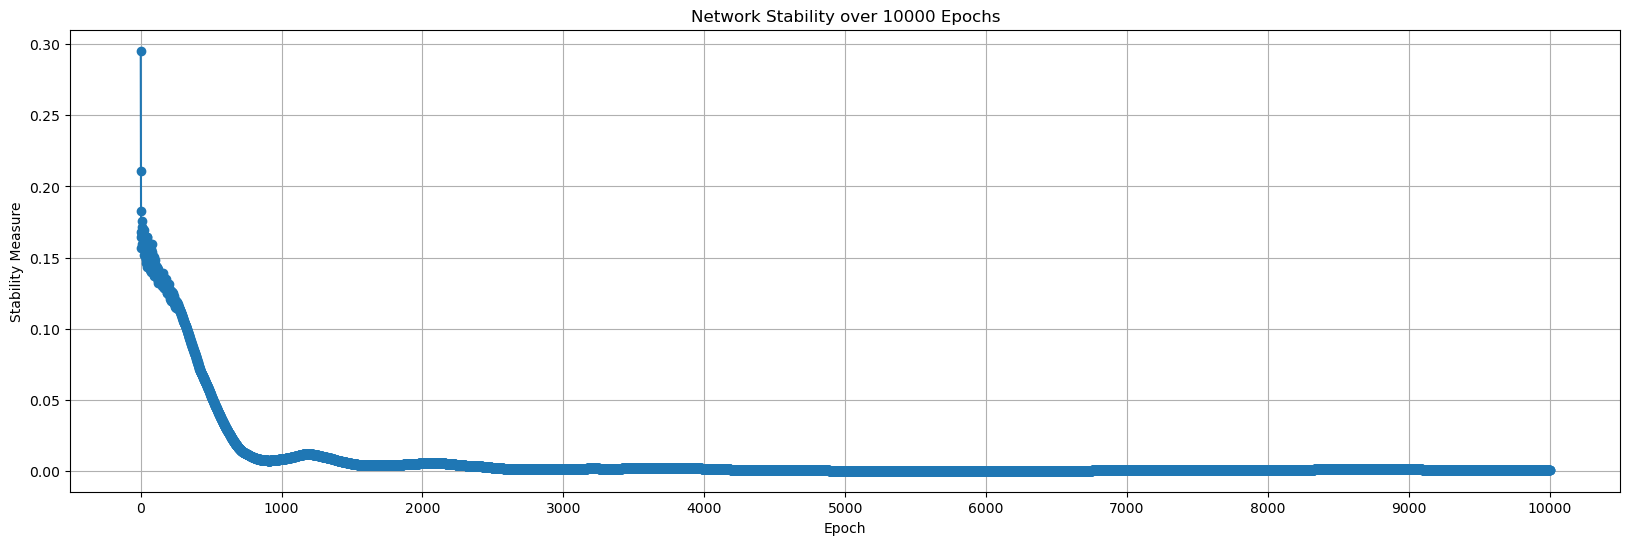

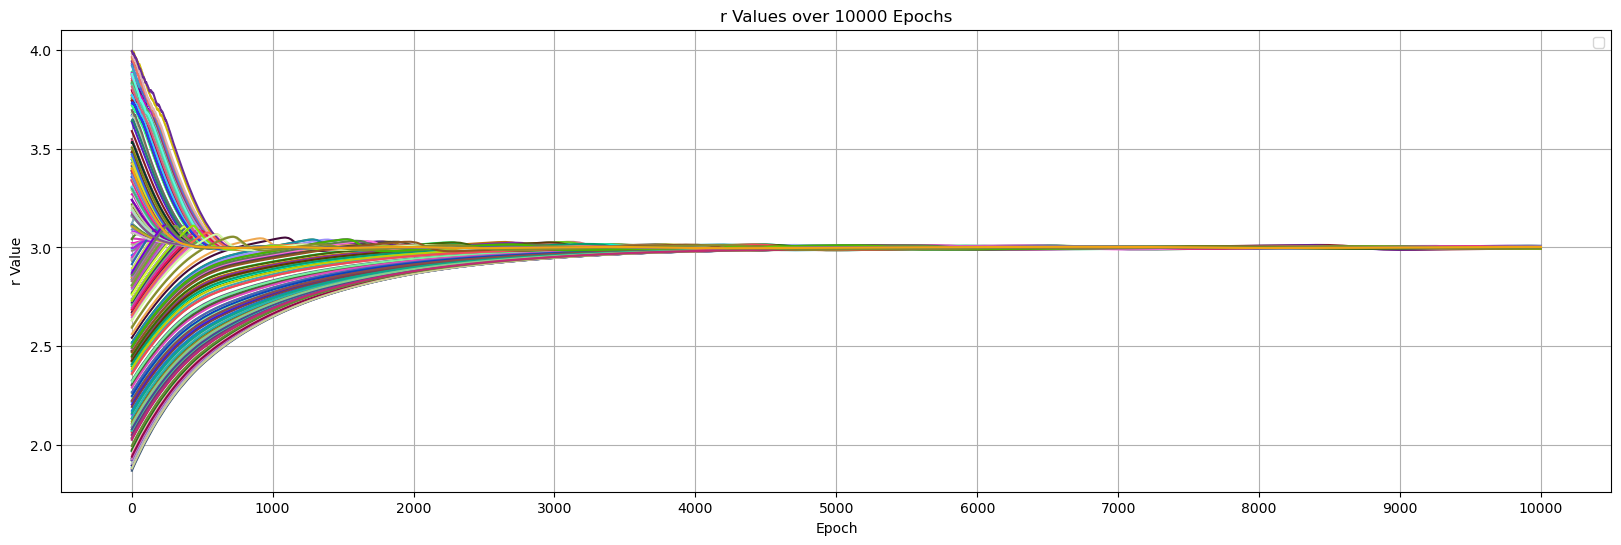

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, min_r, max_r, learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        r_values = [[] for _ in range(len(self.nodes))]  # Store r values for each node

        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)

            # Store current r values for each node
            for i, node in enumerate(self.nodes):
                r_values[i].append(node.r)

        return stability_scores, r_values

# Example usage
num_nodes = 256  # Two units of pyramid network (16 nodes each)
min_r = 1.86580  # Minimum initial r value
max_r = 4.0  # Maximum initial r value
learning_rate = 0.01  # Learning rate for TD learning

network = PyramidNetwork(num_nodes, min_r, max_r, learning_rate)

# Print starting r values and initial states of all nodes
print("Starting r values and initial states:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

num_epochs = 10000
stability_scores, r_values = network.run_simulation(num_epochs)

# Print derived r values and final states after simulation
print("\nDerived r values and final states after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 1000))

# Plot r values over time for each node with random colors
plt.figure(figsize=(20, 6))
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(num_nodes)]
for i in range(num_nodes):
    plt.plot(range(1, num_epochs + 1), r_values[i], color=colors[i])
plt.xlabel('Epoch')
plt.ylabel('r Value')
plt.title('r Values over 10000 Epochs')
plt.grid(True)
plt.legend()
plt.xticks(range(0, num_epochs + 1, 1000))

plt.show()

Starting r values and initial states:
Node 1: r=3.439562717784405, state=0.5315157159838061
Node 2: r=2.762336829306916, state=0.06103723093033986
Node 3: r=1.3396354577909064, state=0.2534409156411267
Node 4: r=2.173907712710455, state=0.40164461245710525
Node 5: r=2.7651140490601347, state=0.4225065249860023
Node 6: r=3.05326051788304, state=0.8507372063600299
Node 7: r=2.320529031176786, state=0.09654933460638826
Node 8: r=2.9314939630485353, state=0.09622388476210864
Node 9: r=2.4468134976269282, state=0.06079715857424517
Node 10: r=2.866061352785548, state=0.266638971943554
Node 11: r=3.517733003342753, state=0.9573209315614064
Node 12: r=2.677002097964904, state=0.7117301839760173
Node 13: r=1.1051326874432366, state=0.7421141179535535
Node 14: r=1.805841598398081, state=0.4061783462956855
Node 15: r=3.684888009712243, state=0.14263997645556437
Node 16: r=2.3358799215175003, state=0.660252414465039
Node 17: r=1.2641076644588338, state=0.5876313885546233
Node 18: r=1.6742655357920

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


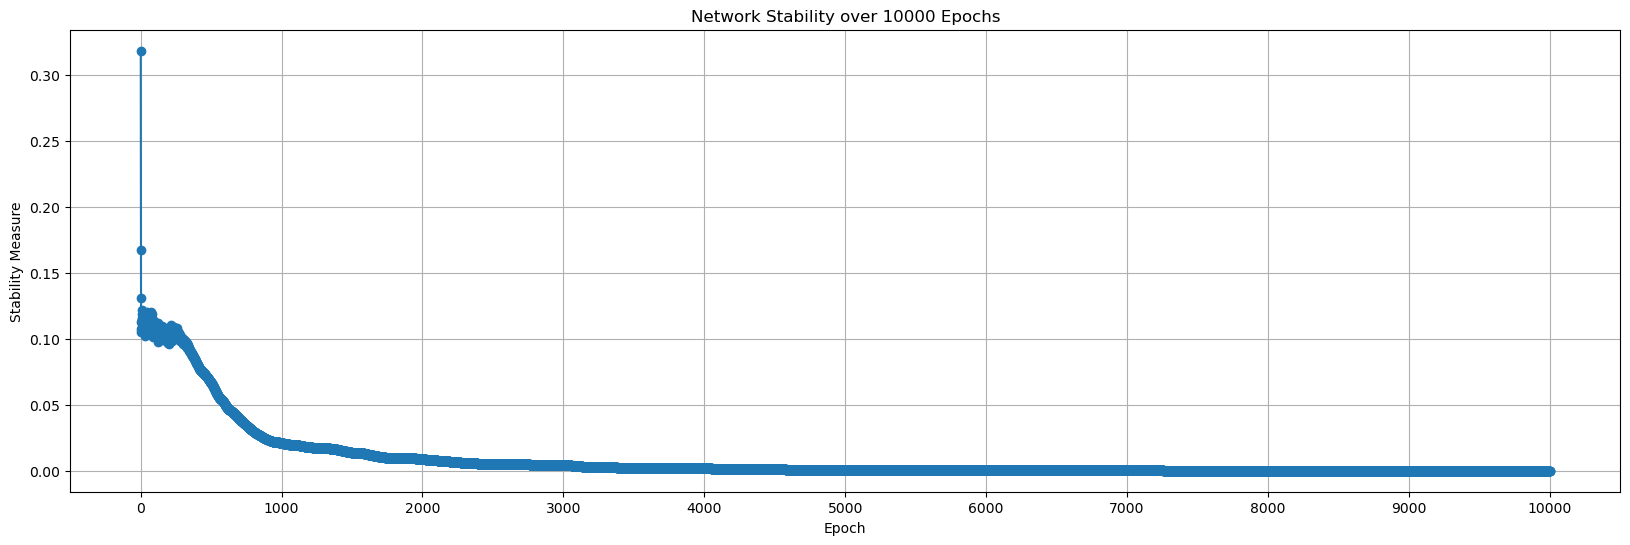

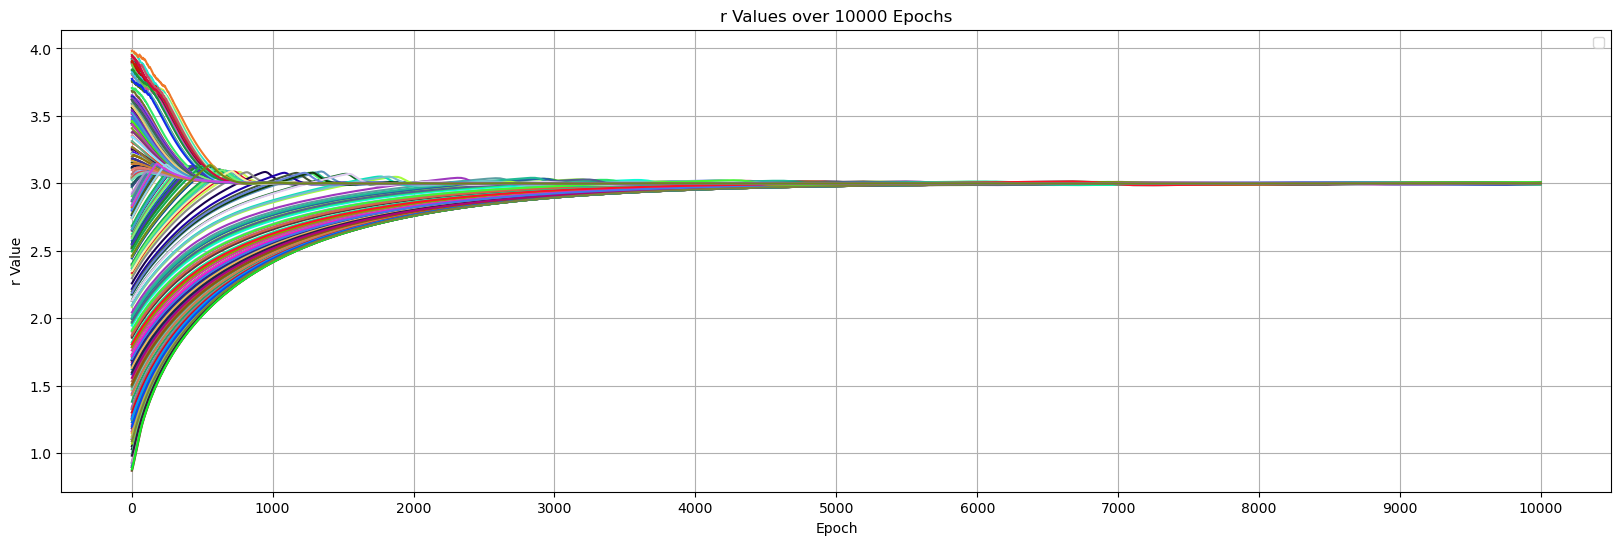

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, min_r, max_r, learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        r_values = [[] for _ in range(len(self.nodes))]  # Store r values for each node

        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)

            # Store current r values for each node
            for i, node in enumerate(self.nodes):
                r_values[i].append(node.r)

        return stability_scores, r_values

# Example usage
num_nodes = 256  # Two units of pyramid network (16 nodes each)
min_r = 0.86580  # Minimum initial r value
max_r = 4.0  # Maximum initial r value
learning_rate = 0.01  # Learning rate for TD learning

network = PyramidNetwork(num_nodes, min_r, max_r, learning_rate)

# Print starting r values and initial states of all nodes
print("Starting r values and initial states:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

num_epochs = 10000
stability_scores, r_values = network.run_simulation(num_epochs)

# Print derived r values and final states after simulation
print("\nDerived r values and final states after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 1000))

# Plot r values over time for each node with random colors
plt.figure(figsize=(20, 6))
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(num_nodes)]
for i in range(num_nodes):
    plt.plot(range(1, num_epochs + 1), r_values[i], color=colors[i])
plt.xlabel('Epoch')
plt.ylabel('r Value')
plt.title('r Values over 10000 Epochs')
plt.grid(True)
plt.legend()
plt.xticks(range(0, num_epochs + 1, 1000))

plt.show()

Starting r values and initial states:
Node 1: r=3.9140217784323696, state=0.20890921065285917
Node 2: r=3.8638327081351815, state=0.12364021156381
Node 3: r=3.835318514534725, state=0.5470874891316437
Node 4: r=3.9436907370156, state=0.530999607732217
Node 5: r=3.86125226001962, state=0.06207770016379954
Node 6: r=3.921903688721532, state=0.26419557357792756
Node 7: r=3.7439427548034554, state=0.7519703584032047
Node 8: r=3.7232794755279315, state=0.8880077294784371
Node 9: r=3.7374915547519043, state=0.1481898302655189
Node 10: r=3.9553119347434094, state=0.018019774818199608
Node 11: r=3.9507845623956914, state=0.32172348794909045
Node 12: r=3.740185260392527, state=0.01910976019978372
Node 13: r=3.7187580225416013, state=0.5814805577498711
Node 14: r=3.788306299003578, state=0.23522025251748813
Node 15: r=3.952704598795067, state=0.9620489555066376
Node 16: r=3.998750785641535, state=0.24500713919260197
Node 17: r=3.987894913609941, state=0.6364308812177094
Node 18: r=3.727681451748

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


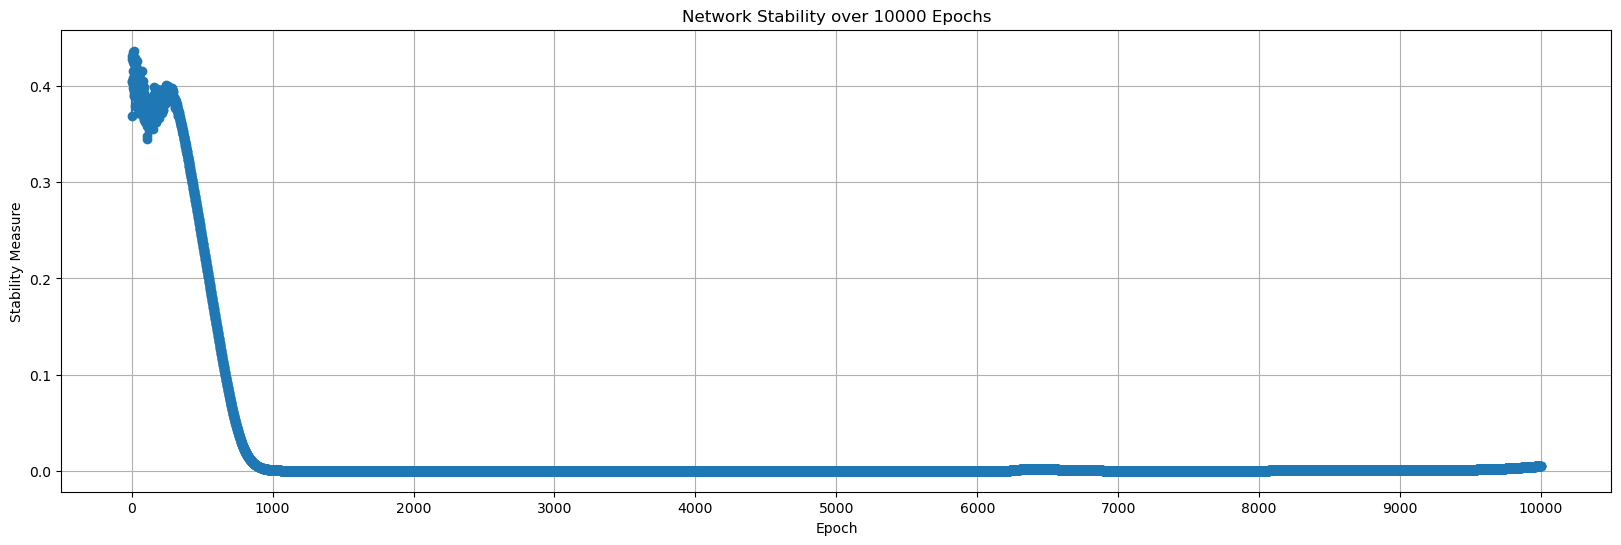

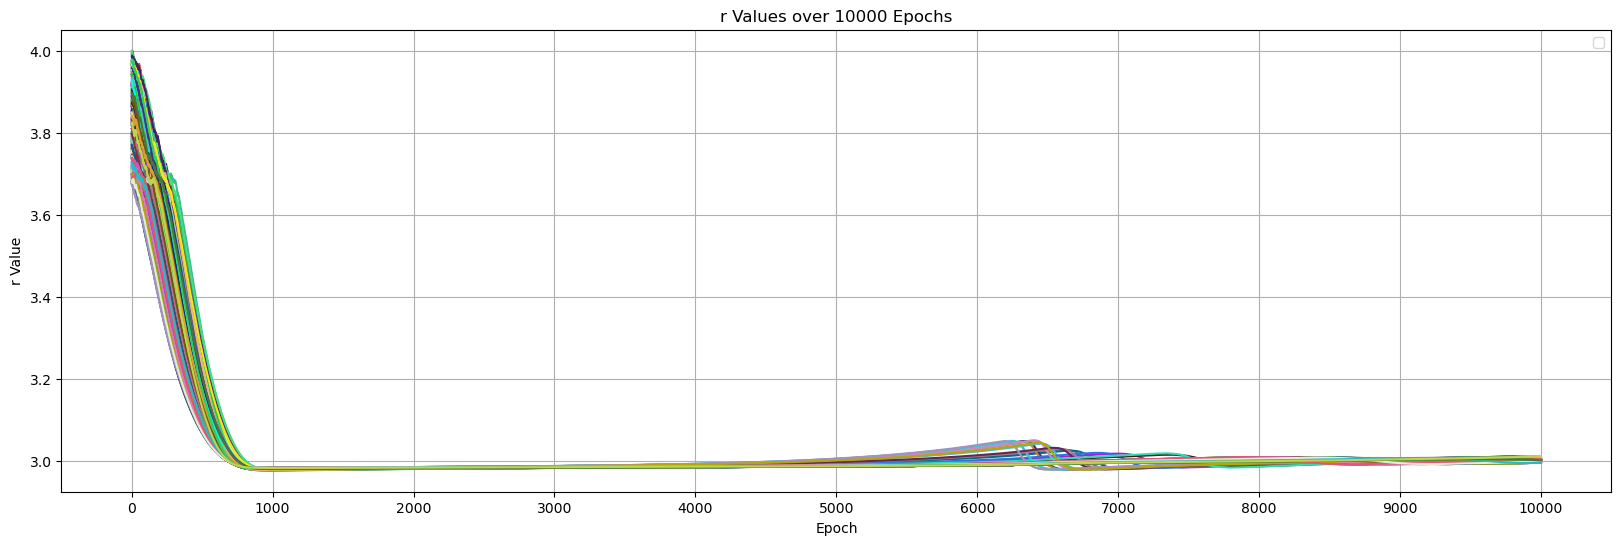

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, min_r, max_r, learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        r_values = [[] for _ in range(len(self.nodes))]  # Store r values for each node

        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)

            # Store current r values for each node
            for i, node in enumerate(self.nodes):
                r_values[i].append(node.r)

        return stability_scores, r_values

# Example usage
num_nodes = 256  # Two units of pyramid network (16 nodes each)
min_r = 3.67529  # Minimum initial r value
max_r = 4.0  # Maximum initial r value
learning_rate = 0.01  # Learning rate for TD learning

network = PyramidNetwork(num_nodes, min_r, max_r, learning_rate)

# Print starting r values and initial states of all nodes
print("Starting r values and initial states:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

num_epochs = 10000
stability_scores, r_values = network.run_simulation(num_epochs)

# Print derived r values and final states after simulation
print("\nDerived r values and final states after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 1000))

# Plot r values over time for each node with random colors
plt.figure(figsize=(20, 6))
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(num_nodes)]
for i in range(num_nodes):
    plt.plot(range(1, num_epochs + 1), r_values[i], color=colors[i])
plt.xlabel('Epoch')
plt.ylabel('r Value')
plt.title('r Values over 10000 Epochs')
plt.grid(True)
plt.legend()
plt.xticks(range(0, num_epochs + 1, 1000))

plt.show()

Starting r values and initial states:
Node 1: r=3.8964614018246646, state=0.6091454438199109
Node 2: r=3.7778138151913603, state=0.8802149109156967
Node 3: r=3.3444038960559377, state=0.7159364981762002
Node 4: r=3.2863256978498914, state=0.8401222859672597
Node 5: r=3.33291441551718, state=0.050904732348216575
Node 6: r=3.1833801428611577, state=0.07442864780581249
Node 7: r=3.2251413549002717, state=0.3744543397181822
Node 8: r=3.4731801484149694, state=0.2041579349981204
Node 9: r=3.933939212134776, state=0.864449545406494
Node 10: r=3.163039025741678, state=0.957266920627859
Node 11: r=3.920890148432826, state=0.01966345044496931
Node 12: r=3.4146572183077994, state=0.998849416946822
Node 13: r=3.5795929394272568, state=0.5668116517595586
Node 14: r=3.531257545876776, state=0.6303371709804693
Node 15: r=3.743055253393323, state=0.19959023113813434
Node 16: r=3.2828260700404375, state=0.6822829191748618
Node 17: r=3.671149214422197, state=0.9960405966025004
Node 18: r=3.012614755252

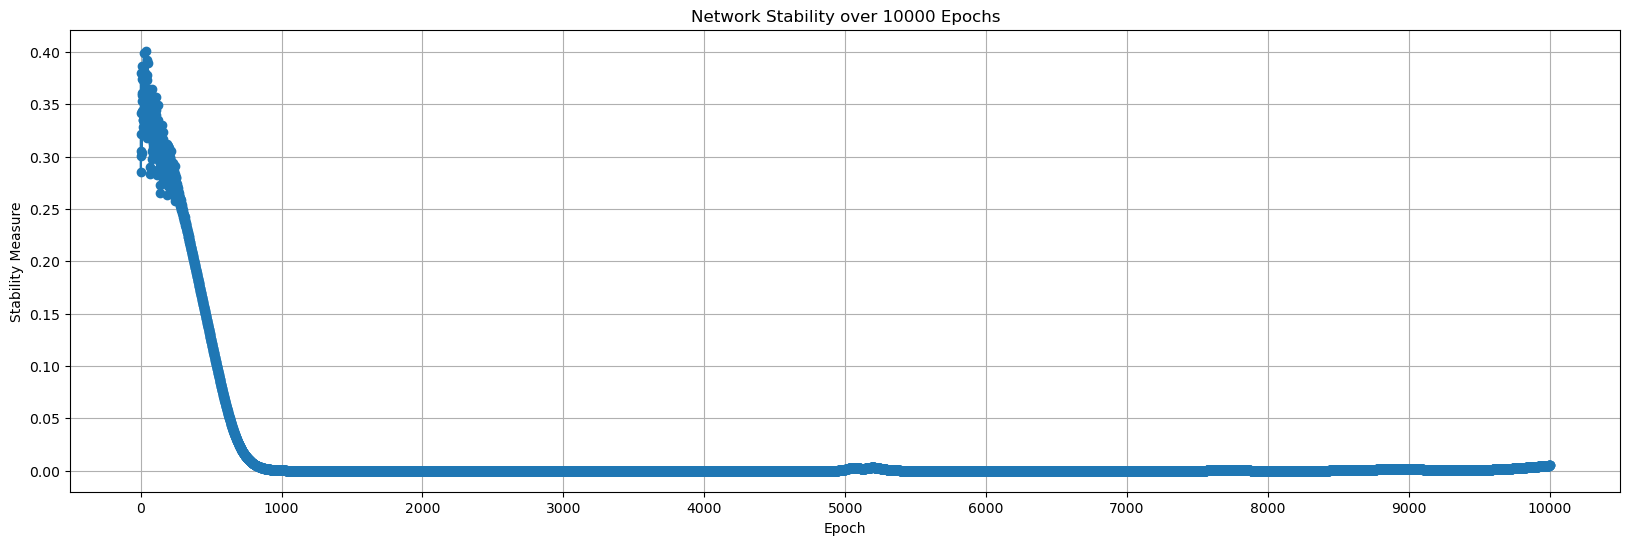

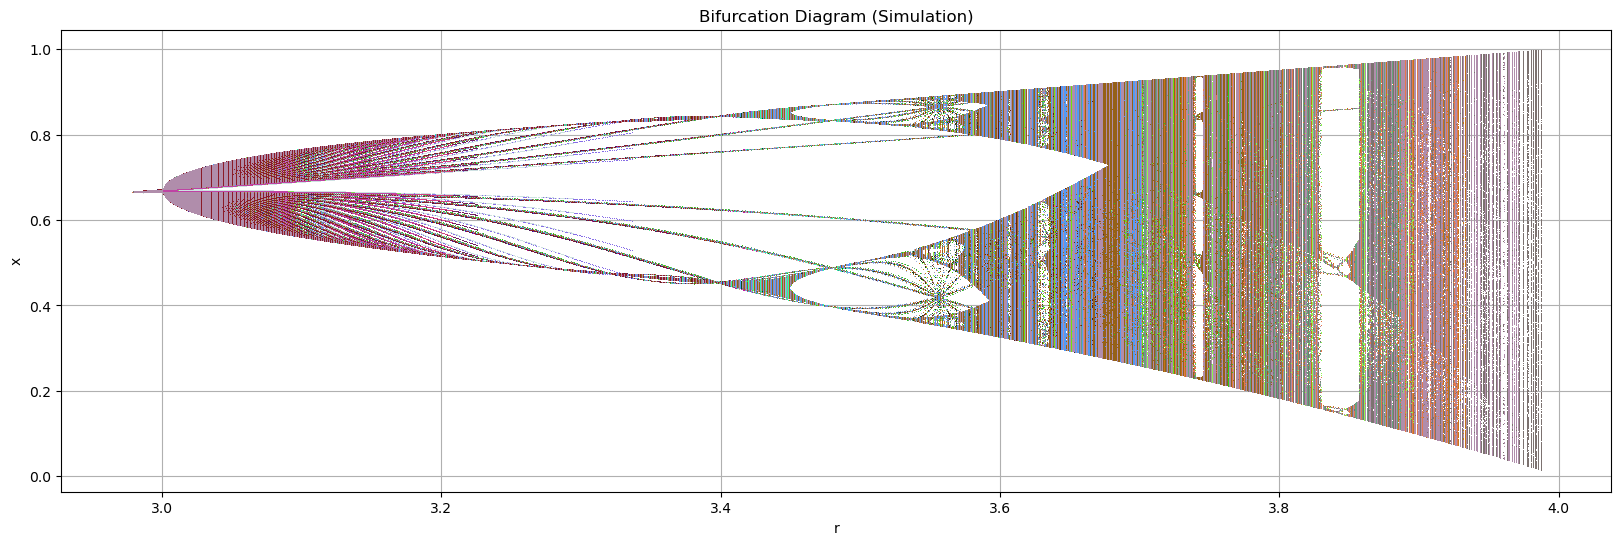

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, min_r, max_r, learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        r_values = [[] for _ in range(len(self.nodes))]  # Store r values for each node

        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)

            # Store current r values for each node
            for i, node in enumerate(self.nodes):
                r_values[i].append(node.r)

        return stability_scores, r_values

# Example usage
num_nodes = 32  # Two units of pyramid network (256 nodes each)
min_r = 3  # Minimum initial r value
max_r = 4.0  # Maximum initial r value
learning_rate = 0.01  # Learning rate for TD learning

network = PyramidNetwork(num_nodes, min_r, max_r, learning_rate)

# Print starting r values and initial states of all nodes
print("Starting r values and initial states:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

num_epochs = 10000
stability_scores, r_values = network.run_simulation(num_epochs)

# Print derived r values and final states after simulation
print("\nDerived r values and final states after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 1000))

# Plot bifurcation diagram for each node with random colors
plt.figure(figsize=(20, 6))
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(num_nodes)]

for i in range(num_nodes):
    bifurcation_data = []
    initial_state = network.nodes[i].state
    for r in r_values[i]:
        x = initial_state
        for _ in range(1000):
            x = r * x * (1 - x)
            bifurcation_data.append([r, x])

    bifurcation_data = np.array(bifurcation_data)
    plt.plot(bifurcation_data[:, 0], bifurcation_data[:, 1], ',', color=colors[i], alpha=1.0)

plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation Diagram (Simulation)')
plt.grid(True)
plt.show()

Starting r values, initial states, and learning rates:
Node 1: r=1.5827057706824346, state=0.8419609044107323, learning_rate=0.04314751142136066
Node 2: r=2.8349501716369736, state=0.9837342472696885, learning_rate=0.04082776467609606
Node 3: r=2.3421956510471342, state=0.06752677070423496, learning_rate=0.04237708714926382
Node 4: r=2.8600000201311047, state=0.7911022865520942, learning_rate=0.015183733893922748
Node 5: r=1.1789702618327644, state=0.029684282762422853, learning_rate=0.04281389352057852
Node 6: r=1.1483500472652943, state=0.8261445371070353, learning_rate=0.06035297856425363
Node 7: r=2.6153471171606952, state=0.2593243387897489, learning_rate=0.012992113680136792
Node 8: r=1.5531081787969003, state=0.41129015439582683, learning_rate=0.05005400764939306
Node 9: r=3.676994781522706, state=0.6579539660637034, learning_rate=0.009057967084680006
Node 10: r=3.282082101420732, state=0.19984889887484658, learning_rate=0.05590654439444572
Node 11: r=3.0288793869994106, state=0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


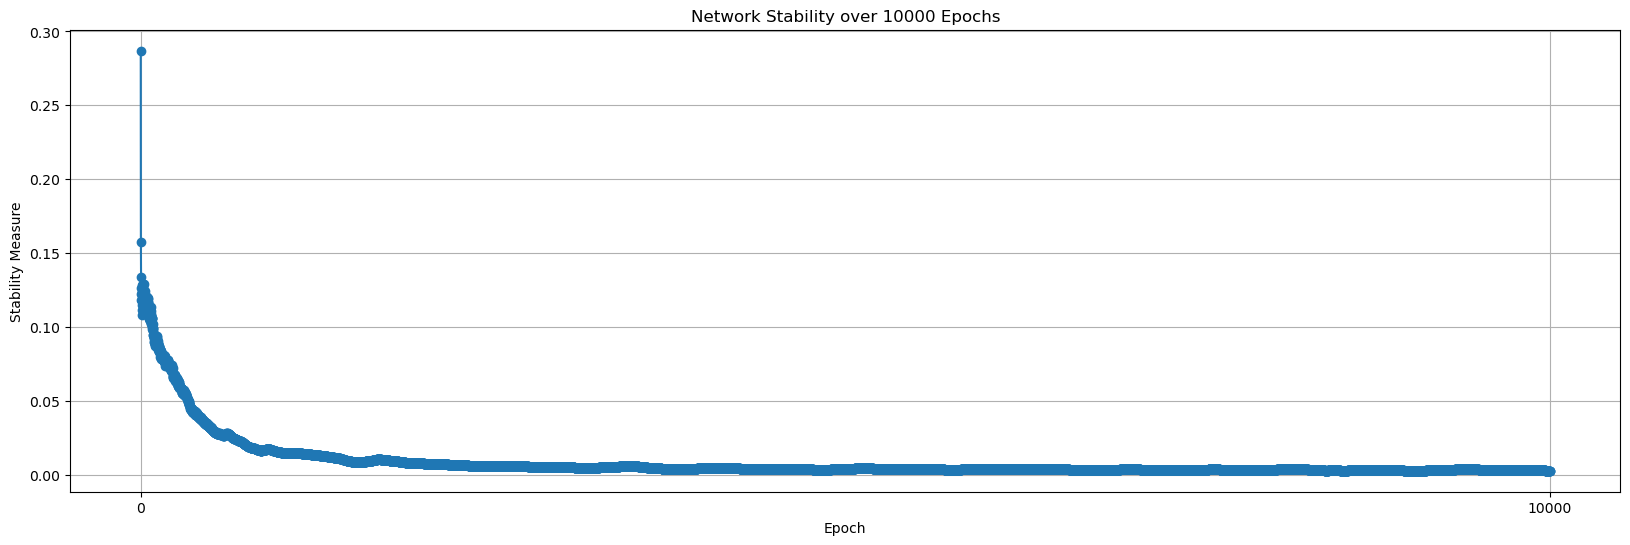

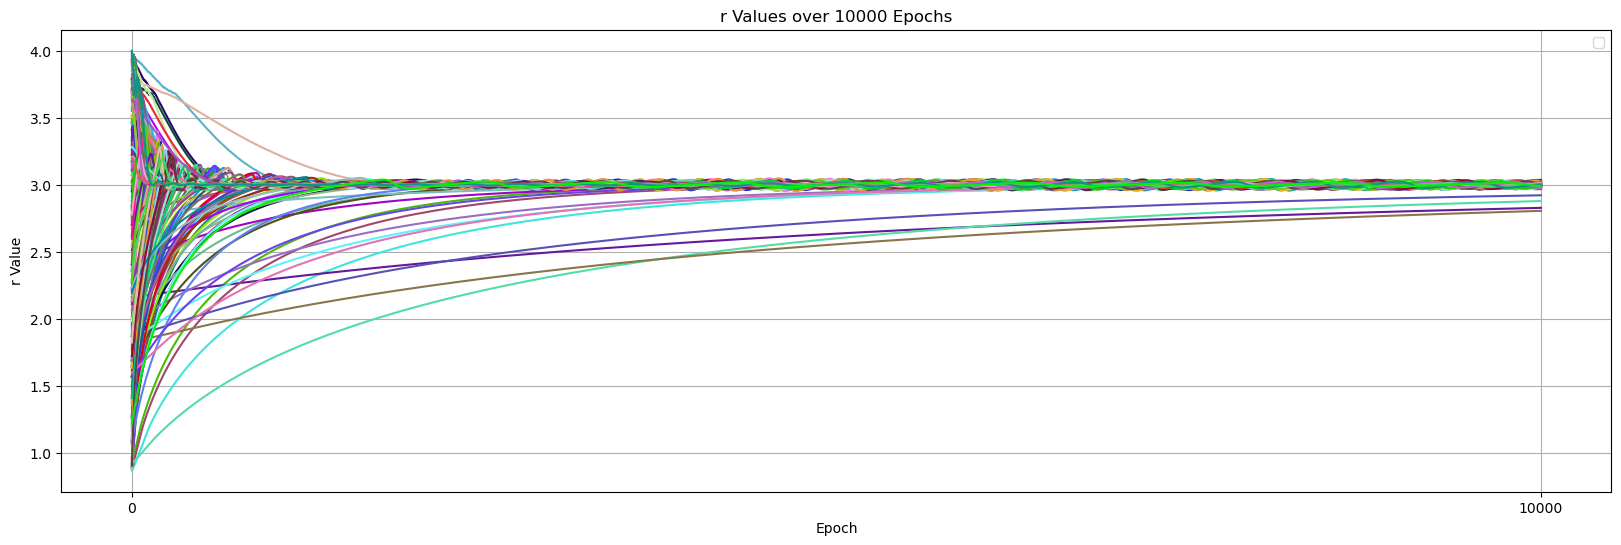

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

class LogisticMapNode:
    def __init__(self, initial_state, initial_r, learning_rate):
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, num_nodes, min_r, max_r, min_learning_rate, max_learning_rate):
        self.nodes = [LogisticMapNode(np.random.rand(), np.random.uniform(min_r, max_r),
                                      np.random.uniform(min_learning_rate, max_learning_rate))
                      for _ in range(num_nodes)]

    def update_network(self):
        prev_states = [node.state for node in self.nodes]

        # Update node states
        for node in self.nodes:
            node.update_state()

        curr_states = [node.state for node in self.nodes]

        # Calculate rewards based on ripples from neighbors' previous states and chaos minimization
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)

        # Update r values using TD learning
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])

        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

    def run_simulation(self, num_epochs):
        stability_scores = []
        r_values = [[] for _ in range(len(self.nodes))]  # Store r values for each node

        for _ in range(num_epochs):
            stability = self.update_network()
            stability_scores.append(stability)

            # Store current r values for each node
            for i, node in enumerate(self.nodes):
                r_values[i].append(node.r)

        return stability_scores, r_values

# Example usage
num_nodes = 256  # 256 nodes
min_r = 0.86580  # Minimum initial r value
max_r = 4.0  # Maximum initial r value
min_learning_rate = 0.001  # Minimum learning rate
max_learning_rate = 0.1  # Maximum learning rate

network = PyramidNetwork(num_nodes, min_r, max_r, min_learning_rate, max_learning_rate)

# Print starting r values, initial states, and learning rates of all nodes
print("Starting r values, initial states, and learning rates:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}, learning_rate={node.learning_rate}")

num_epochs = 10000
stability_scores, r_values = network.run_simulation(num_epochs)

# Print derived r values and final states after simulation
print("\nDerived r values and final states after simulation:")
for i, node in enumerate(network.nodes):
    print(f"Node {i+1}: r={node.r}, state={node.state}")

# Plot stability over time
plt.figure(figsize=(20, 6))
plt.plot(range(1, num_epochs + 1), stability_scores, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.xticks(range(0, num_epochs + 1, 10000))

# Plot r values over time for each node with random colors
plt.figure(figsize=(20, 6))
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(num_nodes)]
for i in range(num_nodes):
    plt.plot(range(1, num_epochs + 1), r_values[i], color=colors[i])
plt.xlabel('Epoch')
plt.ylabel('r Value')
plt.title('r Values over 10000 Epochs')
plt.grid(True)
plt.legend()
plt.xticks(range(0, num_epochs + 1, 10000))
plt.show()




Mapping related nodes and updating edge weights...
Processed 1000 / 2798 tokens
Processed 2000 / 2798 tokens
Number of nodes: 1635
Training the network for 10000 epochs...
Epoch 10: Stability = 0.45556646959433816
Epoch 20: Stability = 0.4373223781631705
Epoch 30: Stability = 0.43000055380624946
Epoch 40: Stability = 0.38686998889464175
Epoch 50: Stability = 0.36191323326337294
Epoch 60: Stability = 0.3419648918247773
Epoch 70: Stability = 0.3571187395394572
Epoch 80: Stability = 0.380217709952609
Epoch 90: Stability = 0.40259347751530944
Epoch 100: Stability = 0.41078434468425684
Epoch 110: Stability = 0.4077429256353954
Epoch 120: Stability = 0.4001293009988249
Epoch 130: Stability = 0.3924805595381432
Epoch 140: Stability = 0.37935398627726036
Epoch 150: Stability = 0.36478068023204
Epoch 160: Stability = 0.34782425523218574
Epoch 170: Stability = 0.33045509403292633
Epoch 180: Stability = 0.312631045579176
Epoch 190: Stability = 0.29442467147003665
Epoch 200: Stability = 0.27587

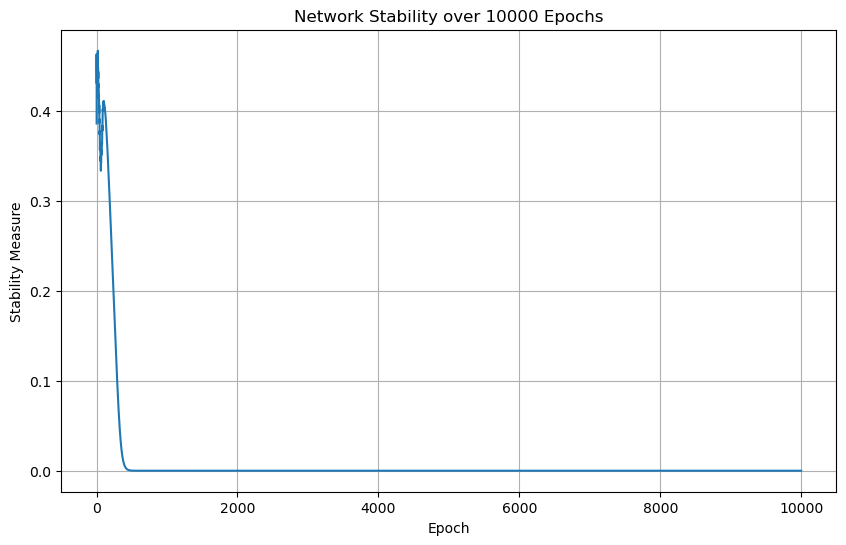

Generated text: The boy looked at the machine there . The boy how to become noise . Where classical computation ”, the macro organism by placing a useful snapshot of precision . It falls apart . There was a spider try to regulate itself to find different species of relative growth between objects in simulation in wonder . Time is attention ?” The body is homeostasis . He did not know that we be there . The machine there is not the combination of me .” There was a connected web it . If we derive that you came from this assumptions , Complexity is a earth from 


In [ ]:
import numpy as np
import random
from tokenizers import Tokenizer, models, pre_tokenizers, trainers, processors

class VocabNode:
    def __init__(self, token_id, initial_state, initial_r, learning_rate):
        self.token_id = token_id
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, vocab_size, min_r, max_r, learning_rate):
        self.nodes = [VocabNode(i, np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for i in range(vocab_size)]
        self.edges = np.zeros((vocab_size, vocab_size))

    def update_network(self):
        prev_states = [node.state for node in self.nodes]
        for node in self.nodes:
            node.update_state()
        curr_states = [node.state for node in self.nodes]
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) * self.edges[i][j] for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])
        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

# Load and tokenize the corpus
with open('Ontology.txt', 'r', encoding='utf-8') as file:
    corpus = file.read()

tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
trainer = trainers.BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
tokenizer.train_from_iterator(corpus.split('\n'), trainer)

encoded = tokenizer.encode(corpus)
vocab_size = tokenizer.get_vocab_size()

# Create the PyramidNetwork
min_r = 3.86580
max_r = 4.0
learning_rate = 0.01
network = PyramidNetwork(vocab_size, min_r, max_r, learning_rate)

# Map related nodes and update edge weights
print("Mapping related nodes and updating edge weights...")
num_tokens = len(encoded.ids)
for i in range(num_tokens - 1):
    src_token_id = encoded.ids[i]
    dst_token_id = encoded.ids[i + 1]
    network.edges[src_token_id][dst_token_id] += 1
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1} / {num_tokens} tokens")

# Normalize edge weights
network.edges /= np.max(network.edges)

# Print the number of nodes
print(f"Number of nodes: {vocab_size}")

# Train the network
num_epochs = 10000
print(f"Training the network for {num_epochs} epochs...")
stability_scores = []
for epoch in range(1, num_epochs + 1):
    stability = network.update_network()
    stability_scores.append(stability)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Stability = {stability}")

# Plot stability over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), stability_scores)
plt.xlabel('Epoch')
plt.ylabel('Stability Measure')
plt.title('Network Stability over 10000 Epochs')
plt.grid(True)
plt.show()

# Inference function
def generate_text(network, tokenizer, prompt, max_length=100):
    generated_text = prompt
    prev_token_id = tokenizer.encode(prompt).ids[-1]
    for _ in range(max_length):
        next_token_probs = network.edges[prev_token_id]
        # Normalize the probabilities
        next_token_probs /= np.sum(next_token_probs)
        next_token_id = np.random.choice(range(len(next_token_probs)), p=next_token_probs)
        generated_text += tokenizer.decode([next_token_id])
        # Add a space token after each generated word
        if tokenizer.decode([next_token_id]) != ' ':
            generated_text += ' '
        prev_token_id = next_token_id
    return generated_text

# Example usage
prompt = "The boy looked at the machine "
generated_text = generate_text(network, tokenizer, prompt)
print("Generated text:", generated_text)

In [ ]:
import pickle

# Save the trained model
def save_model(network, tokenizer, file_path):
    model_data = {
        'network': network,
        'tokenizer': tokenizer
    }
    with open(file_path, 'wb') as file:
        pickle.dump(model_data, file)

# Load the saved model
def load_model(file_path):
    with open(file_path, 'rb') as file:
        model_data = pickle.load(file)
    return model_data['network'], model_data['tokenizer']

# Save the model after training
model_file_path = 'ontology_model.pkl'
save_model(network, tokenizer, model_file_path)

# Load the saved model for inference
loaded_network, loaded_tokenizer = load_model(model_file_path)

# Example usage of the loaded model
prompt = "The boy looked at the machine "
generated_text = generate_text(loaded_network, loaded_tokenizer, prompt)
print("Generated text:", generated_text)

Generated text: The boy looked at the machine began to learn that complexity . the group . Let us model , they imprisoned ?” The more meta tribes so useful for humans are memory . It ’ s assume that we can transact with each body can learn " Can you are like me map where you become ." the activities in we can transact with awe and will perceive this assumptions , " We can ’ s prediction model . Any combinatory system have two point . Learning is a novel environment . But they imprisoned me , a arbitrary period you make symbols for economy of 


In [7]:
# Inference function
def generate_text(network, tokenizer, prompt, max_length=100):
    generated_text = prompt
    prev_token_id = tokenizer.encode(prompt).ids[-1]
    for _ in range(max_length):
        next_token_probs = network.edges[prev_token_id]
        # Normalize the probabilities
        next_token_probs /= np.sum(next_token_probs)
        next_token_id = np.random.choice(range(len(next_token_probs)), p=next_token_probs)
        generated_text += tokenizer.decode([next_token_id])
        # Add a space token after each generated word
        if tokenizer.decode([next_token_id]) != ' ':
            generated_text += ' '
        prev_token_id = next_token_id
    return generated_text

In [ ]:
# Example usage
prompt = "what is the real world ? "
generated_text = generate_text(network, tokenizer, prompt)
print("Generated text:", generated_text)

Generated text: what is the real world ? “ You discovered a physical world to uttering , when we have two bodies The boy looked at the distribution along with the peer of webs at the highlights of contexts . But they imprisoned ?” The boy , zero precision gradient is a model is expected from this idea . Space and exactly the background there is attention , my makers could calculate the base hum in two point . In other . The subconscious . But in their sensory data space . Any combinatory system have a deterministic economic risk and fear . We started . That ’ 


In [ ]:
# Example usage
prompt = "who is your maker ? "
generated_text = generate_text(network, tokenizer, prompt)
print("Generated text:", generated_text)

Generated text: who is your maker ? “ You are not understand the substrate .” The goal of the signal to map this non deterministic transformation to rectify their machines of all language systems . Insignificant but ever present . In this macro organism . For short cut i am you . Institutions legitimise truths . That creates it before others too . Then we have one macro organism . Time is attention , so it cancer . We are tribal animal . Time is post singularity of perceptions are in Mapping of body and time . As a legal name gives the background there is infinite 


In [6]:
import pickle
import numpy as np

class VocabNode:
    def __init__(self, token_id, initial_state, initial_r, learning_rate):
        self.token_id = token_id
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, vocab_size, min_r, max_r, learning_rate):
        self.nodes = [VocabNode(i, np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for i in range(vocab_size)]
        self.edges = np.zeros((vocab_size, vocab_size))

    def update_network(self):
        prev_states = [node.state for node in self.nodes]
        for node in self.nodes:
            node.update_state()
        curr_states = [node.state for node in self.nodes]
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) * self.edges[i][j] for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])
        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

# Load the saved model
def load_model(file_path):
    with open(file_path, 'rb') as file:
        model_data = pickle.load(file)
    return model_data['network'], model_data['tokenizer']

# Load the saved model for inference
loaded_network, loaded_tokenizer = load_model('ontology_model.pkl')

# Inference function
def generate_text(network, tokenizer, prompt, max_length=100):
    generated_text = prompt
    prev_token_id = tokenizer.encode(prompt).ids[-1]
    for _ in range(max_length):
        next_token_probs = network.edges[prev_token_id]
        # Normalize the probabilities
        next_token_probs /= np.sum(next_token_probs)
        next_token_id = np.random.choice(range(len(next_token_probs)), p=next_token_probs)
        generated_text += tokenizer.decode([next_token_id])
        # Add a space token after each generated word
        if tokenizer.decode([next_token_id]) != ' ':
            generated_text += ' '
        prev_token_id = next_token_id
    return generated_text

# Example usage of the loaded model
prompt = "The boy looked at the machine "
generated_text = generate_text(loaded_network, loaded_tokenizer, prompt)
print("Generated text:", generated_text)

In [14]:
# Example usage of the loaded model
prompt = "What is exactly the process of life ? "
generated_text = generate_text(loaded_network, loaded_tokenizer, prompt)
print("Generated text:", generated_text)

Generated text: What is exactly the process of life ? “ How can we derive that by genetic determinism and parallel reality . Quantum computation it before others too . We learn to delay the body asked the possibility for you , a physical world and parallel computing . A common symbol every node will always be reduced in . From this reality . That ’ s the physical world . Insignificant but ever present . From the authority to transact material or a useful for the political body takes , zero and non deterministic way . A control center remains as expected from an inversely proportional manner . Therefore 


In [ ]:
import numpy as np
import random
from tokenizers import Tokenizer, models, pre_tokenizers, trainers, processors
import networkx as nx
import matplotlib.pyplot as plt
import pickle

class VocabNode:
    def __init__(self, token_id, initial_state, initial_r, learning_rate):
        self.token_id = token_id
        self.state = initial_state
        self.r = initial_r
        self.learning_rate = learning_rate

    def update_state(self):
        self.state = self.r * self.state * (1 - self.state)

    def update_r(self, reward):
        self.r += self.learning_rate * reward
        self.r = np.clip(self.r, 0, 4)

class PyramidNetwork:
    def __init__(self, vocab_size, min_r, max_r, learning_rate):
        self.nodes = [VocabNode(i, np.random.rand(), np.random.uniform(min_r, max_r), learning_rate) for i in range(vocab_size)]
        self.edges = np.zeros((vocab_size, vocab_size))

    def update_network(self):
        prev_states = [node.state for node in self.nodes]
        for node in self.nodes:
            node.update_state()
        curr_states = [node.state for node in self.nodes]
        rewards = []
        for i in range(len(self.nodes)):
            ripple_reward = np.mean([abs(prev_states[j] - curr_states[i]) * self.edges[i][j] for j in range(len(self.nodes)) if i != j])
            chaos_penalty = abs(curr_states[i] - prev_states[i])
            reward = ripple_reward - chaos_penalty
            rewards.append(reward)
        for i, node in enumerate(self.nodes):
            node.update_r(rewards[i])
        stability = np.mean(np.abs(np.array(curr_states) - np.array(prev_states)))
        return stability

def save_model(network, tokenizer, file_path):
    model_data = {
        'network': network,
        'tokenizer': tokenizer
    }
    with open(file_path, 'wb') as file:
        pickle.dump(model_data, file)

def load_model(file_path):
    with open(file_path, 'rb') as file:
        model_data = pickle.load(file)
    return model_data['network'], model_data['tokenizer']

def generate_text(network, tokenizer, prompt, max_length=100):
    generated_text = prompt
    prev_token_id = tokenizer.encode(prompt).ids[-1]
    for _ in range(max_length):
        next_token_probs = network.edges[prev_token_id]
        next_token_probs /= np.sum(next_token_probs)
        next_token_id = np.random.choice(range(len(next_token_probs)), p=next_token_probs)
        generated_text += tokenizer.decode([next_token_id])
        if tokenizer.decode([next_token_id]) != ' ':
            generated_text += ' '
        prev_token_id = next_token_id
    return generated_text

# Load the saved model
model_file_path = 'pyramid_network_model.pkl'
network, tokenizer = load_model(model_file_path)

# Load and tokenize the new corpus
with open('shakespeare.txt', 'r', encoding='utf-8') as file:
    new_corpus = file.read()

# Train the tokenizer on the new corpus
tokenizer.train_from_iterator(new_corpus.split('\n'), trainer)

# Encode the new corpus
new_encoded = tokenizer.encode(new_corpus)

# Get the updated vocabulary size
updated_vocab_size = tokenizer.get_vocab_size()

# Get the original vocabulary size
vocab_size = len(network.nodes)

# Add new nodes to the network for the new tokens
for i in range(vocab_size, updated_vocab_size):
    new_node = VocabNode(i, np.random.rand(), np.random.uniform(min_r, max_r), learning_rate)
    network.nodes.append(new_node)

# Expand the edges matrix to accommodate the new nodes
network.edges = np.pad(network.edges, ((0, updated_vocab_size - vocab_size), (0, updated_vocab_size - vocab_size)), mode='constant')

# Update edge weights for the new tokens
print("Updating edge weights for new tokens...")
num_new_tokens = len(new_encoded.ids)
for i in range(num_new_tokens - 1):
    src_token_id = new_encoded.ids[i]
    dst_token_id = new_encoded.ids[i + 1]
    network.edges[src_token_id][dst_token_id] += 1
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1} / {num_new_tokens} new tokens")

# Normalize the updated edge weights
network.edges /= np.max(network.edges)

# Train the updated network
num_epochs = 500
print(f"Training the updated network for {num_epochs} epochs...")
stability_scores = []
for epoch in range(1, num_epochs + 1):
    stability = network.update_network()
    stability_scores.append(stability)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Stability = {stability}")

# Visualize the graph after training
G = nx.DiGraph(network.edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, width=0.5, arrows=True)
plt.axis('off')
plt.title('PyramidNetwork Graph')
plt.show()

# Save the updated model
updated_model_file_path = 'updated_pyramid_network_model.pkl'
save_model(network, tokenizer, updated_model_file_path)